# Projet Python : House Price

# Binôme :
### - Ahmed Seyfeddine GOUMEIDA - MLDS
### - Mohammed Erifai MAAMIR - MLDS

# 1/ DATA PROCESSING

In [15]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
with open('House_Price.csv') as f:
    df = pd.read_csv(f)
f.close()
print("--------------- Head ---------------")
print(df.head())
print()


--------------- Head ---------------
   price  resid_area  air_qual  room_num   age  dist1  dist2  dist3  dist4  \
0   24.0       32.31     0.538     6.575  65.2   4.35   3.81   4.18   4.01   
1   21.6       37.07     0.469     6.421  78.9   4.99   4.70   5.12   5.06   
2   34.7       37.07     0.469     7.185  61.1   5.03   4.86   5.01   4.97   
3   33.4       32.18     0.458     6.998  45.8   6.21   5.93   6.16   5.96   
4   36.2       32.18     0.458     7.147  54.2   6.16   5.86   6.37   5.86   

   teachers  poor_prop airport  n_hos_beds  n_hot_rooms waterbody  rainfall  \
0      24.7       4.98     YES       5.480      11.1920     River        23   
1      22.2       9.14      NO       7.332      12.1728      Lake        42   
2      22.2       4.03      NO       7.394     101.1200      None        38   
3      21.3       2.94     YES       9.268      11.2672      Lake        45   
4      21.3       5.33      NO       8.824      11.2896      Lake        55   

  bus_ter     parks

In [16]:
print("--------------- Info ---------------")
print(df.info())

--------------- Info ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         

### High or Low Feature Variability
The first step I typically take is reviewing the unique count of values per feature to determine if any features can be quickly deleted due to very high or very low variability. In other words, do we have any features which have as many unique values as the length of the dataset or features which have just one unique value?

In [17]:
print("--------------- Discription sur les colonnes ---------------")

print("column", "nunique", "len")
print("------", "-------", "---")

for col in df.columns:
    print(col, df[col].nunique(), len(df))


--------------- Discription sur les colonnes ---------------
column nunique len
------ ------- ---
price 228 506
resid_area 76 506
air_qual 81 506
room_num 446 506
age 356 506
dist1 339 506
dist2 354 506
dist3 339 506
dist4 353 506
teachers 46 506
poor_prop 455 506
airport 2 506
n_hos_beds 454 506
n_hot_rooms 423 506
waterbody 4 506
rainfall 42 506
bus_ter 1 506
parks 506 506
Sold 2 506


We notice that the column "bus_ter" has only one value which is "YES". so we remove this column using the manual code below

In [18]:
#df.drop(['bus_ter'], axis=1, inplace=True)

or automatically with the this code that detect and delete the columns that have only one value

In [19]:
for col in df.columns:
     if df[col].nunique() == 1: 
        print(col, df[col].nunique(), len(df))
        df.drop([col], axis=1, inplace=True)


bus_ter 1 506


In [20]:
print("--------------- Discription sur les colonnes ---------------")

print("column", "nunique", "len")
print("------", "-------", "---")

for col in df.columns:
    print(col, df[col].nunique(), len(df))


--------------- Discription sur les colonnes ---------------
column nunique len
------ ------- ---
price 228 506
resid_area 76 506
air_qual 81 506
room_num 446 506
age 356 506
dist1 339 506
dist2 354 506
dist3 339 506
dist4 353 506
teachers 46 506
poor_prop 455 506
airport 2 506
n_hos_beds 454 506
n_hot_rooms 423 506
waterbody 4 506
rainfall 42 506
parks 506 506
Sold 2 506


### Duplicate Features


Next, by examining the codebook, which contains the definitions for each feature, we search if we have any duplicate features. For example, “first variable” can be numerical feature that produces the code that matches the "the second variable” feature. We can drop one of these features.
in our case each feature contains only one information 

### Odd Values and Data Collection Mistakes


In [21]:
for col in df.columns:
    print(col, df[col].unique(), len(df))

price [24.  21.6 34.7 33.4 36.2 28.7 22.9 22.1 16.5 18.9 15.  21.7 20.4 18.2
 19.9 23.1 17.5 20.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8 18.4 21.
 12.7 13.2 13.1 13.5 20.  24.2 30.8 34.9 26.6 25.3 24.7 21.2 19.3 14.4
 19.4 19.7 20.5 25.  23.4 35.4 31.6 23.3 18.7 16.  22.2 33.  23.5 22.
 17.4 20.9 22.8 24.1 21.4 20.8 20.3 28.  23.9 24.8 22.5 23.6 22.6 20.6
 28.4 38.7 43.8 33.2 27.5 26.5 18.6 20.1 19.5 19.8 18.8 18.5 18.3 19.2
 17.3 15.7 16.2 18.  14.3 23.  18.1 17.1 13.3 17.8 14.  13.4 11.8 13.8
 14.6 15.4 21.5 15.3 17.  41.3 24.3 27.  50.  22.7 23.8 22.3 19.1 29.4
 23.2 24.6 29.9 37.2 39.8 37.9 32.5 26.4 29.6 32.  29.8 30.5 36.4 31.1
 29.1 33.3 30.3 34.6 32.9 42.3 48.5 24.4 22.4 28.1 23.7 26.7 30.1 44.8
 37.6 46.7 31.5 31.7 41.7 48.3 29.  25.1 17.6 24.5 26.2 42.8 21.9 44.
 36.  33.8 43.1 48.8 31.  36.5 30.7 43.5 20.7 21.1 25.2 35.2 32.4 33.1
 35.1 45.4 46.  32.2 28.5 37.3 27.9 28.6 27.1 36.1 28.2 16.1 19.  32.7
 31.2 17.2 16.8 10.2 10.4 10.9 11.3 12.3  8.8  7.2 10.5  7.4 11.5 15.1
  9

From the codebook, we know that features such as “airport”is binary coding for “Yes” and “No”. In order to simplify our analysis and help with formatting, we need to convert the binary to string. 

Finally, we search if there is a coding mistake for like "YES" "yes" "NO" "no"  which needs to be corrected.in our case there is no mistake in this type

### Examining Cardinality


In [22]:
for var in df.columns:
    print(var, '\n', df[var].value_counts()/len(df))


price 
 50.0    0.031621
25.0    0.015810
21.7    0.013834
23.1    0.013834
19.4    0.011858
          ...   
14.2    0.001976
7.4     0.001976
26.7    0.001976
32.9    0.001976
9.7     0.001976
Name: price, Length: 228, dtype: float64
resid_area 
 48.10    0.260870
49.58    0.059289
38.14    0.043478
36.20    0.035573
51.89    0.029644
           ...   
30.74    0.001976
31.89    0.001976
32.31    0.001976
31.21    0.001976
31.76    0.001976
Name: resid_area, Length: 76, dtype: float64
air_qual 
 0.538    0.045455
0.713    0.035573
0.437    0.033597
0.871    0.031621
0.624    0.029644
           ...   
0.518    0.001976
0.394    0.001976
0.435    0.001976
0.385    0.001976
0.422    0.001976
Name: air_qual, Length: 81, dtype: float64
room_num 
 6.167    0.005929
6.405    0.005929
5.713    0.005929
6.417    0.005929
6.127    0.005929
           ...   
7.287    0.001976
7.267    0.001976
6.762    0.001976
6.484    0.001976
5.960    0.001976
Name: room_num, Length: 446, dtype: float64
age

### Low Variance

Cardinality refers to the number of unique values/categories for each feature. Numeric, especially continuous, features will have very high cardinality but we mainly need to concern ourselves from categorical features. First, we need to identify features that contain values/categories which suck up all the variance. In other words, 90%+ of all the observations fall under one or two values. 
in our case there is no probleme because the majority of the cariables are values , and they probably have the same number of cardiality
### Rare Values/Categories

Using the same code as above, we once again turn our attention onto categorical features but this time we are looking for values which we consider “rare”. How you define “rare” is really up to you but I have found that this decision has to be made a feature by feature. Some values might be rare if they appear less than 1% of the time. In other features, the threshold might be 2% or even 5%. Our ultimate goal will be to group these values together into a new value/category called “rare”. This procedure reduces the overall cardinality of the feature and if you choose to one-hot encode your categories features this method will drastically reduce the number of newly created “dummy” features.

in our case there is no probleme for exemple 
airport :
YES    0.551383
NO     0.448617

# 2/ Missing Values

Deciding how to process missing values is one of the most important and contentious decisions a data scientist will make.

In [23]:
for var in df.columns:
    if df[var].isnull().sum()/len(df) > 0:
        print(" the feature : {" , var,"} contains missing values with %=", df[var].isnull().mean().round(3))

 the feature : { n_hos_beds } contains missing values with %= 0.016


{ n_hos_beds }  :  is a categorical feature with only a few missing data points = 0.016 . We can impute this data using the mode as this wouldn’t change the distribution of the feature.
if the missing data is so big (0.4) in this case it will affect the distribution of the feature so it's better to drop the lignes that contains the null or  the feature it self

In [24]:
#df["n_hos_beds"].fillna(df["n_hos_beds"].mode()[0], inplace=True)

we can use the code above to delete a specific column or delete automatically the column that contains null valuesverification that there is no feature with null values.

In [25]:
for var in df.columns:
    if df[var].isnull().sum()/len(df) > 0:
        print(" the feature : {" , var,"} contains missing values with %= ", df[var].isnull().mean().round(3))
        df[var].fillna(df["n_hos_beds"].mode()[0], inplace=True)

 the feature : { n_hos_beds } contains missing values with %=  0.016


# 2-2/ Categorical to Numirical


In [26]:
df['waterbody'] = pd.factorize(df.waterbody)[0]
df['airport'] = pd.factorize(df.airport)[0]

in our dataset we have two Categorical features which are : airport (YES , NO) , and waterbody(River,None,Lake,Lake and River), so we need to convert this categorical values to numirical ones so it will be possible to treat them with other features.

# 3/ Outlier treatment


Outliers are another contentious topic which requires some thought. There are a number of ways of dealing with outliers. If you have a very large dataset and a relatively small number of outliers you can simply delete them. I’m usually wary of this method as it changes the distribution of said feature(s) which might cause new values to become outliers. That said, it is an option often utilized. Other methods include adding an indicator feature, rescaling the entire feature using np.log(), and transforming a continuous feature into discrete by applying discretization which will encompass the outliers into one bin.

First, we need to identify if we have any outliers. The most well-known method for identifying outliers is the z-score method which standardizes the feature values to a mean of zero, a standard deviation of one, and any value which falls 3 standard deviations (plus or minus) is considered an outlier. Personally, I believe this method is flaw as the z-score relies on the mean and standard deviation of the feature. Both the mean and standard deviation are highly influenced by existing outliers. Any outlier included in the calculation of the mean and standard deviation will expand the range of the z-scores and potentially omitting existing outliers. This problem can be overcome by utilizing the median instead of the mean.

Let’s utilize a more robust method that relies on the inter-quartile range and the median. You can adjust this method and use (3 * IQR) to identify only the extreme outliers.

In [27]:
def outlier_treatment(feature):
    sorted(feature)
    q1,q3 = np.percentile(feature , [25,75])
    IQR = q3 - q1
    lower_range = q1 - (1.5 * IQR)
    upper_range = q3 + (1.5 * IQR)
    return lower_range,upper_range


lower_range, upper_range = outlier_treatment(df['price'])
df[(df['price'] < lower_range) | (df['price'] > upper_range)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold
97,38.7,32.89,0.4450,8.069,76.0,3.70,3.32,3.57,3.39,22.0,4.21,0,6.274,12.3096,0,53,0.041201,1
98,43.8,32.89,0.4450,7.820,36.9,3.54,3.42,3.60,3.43,22.0,3.57,0,10.876,10.3504,3,25,0.051130,0
157,41.3,49.58,0.6050,6.943,97.4,1.99,1.76,1.92,1.84,25.3,4.59,0,8.226,13.3304,2,57,0.054814,0
161,50.0,49.58,0.6050,7.489,90.8,2.17,1.89,2.13,1.69,25.3,1.73,0,10.500,11.4000,2,35,0.053897,0
162,50.0,49.58,0.6050,7.802,98.2,2.26,1.76,2.11,2.04,25.3,1.92,0,8.400,12.4000,1,22,0.055682,0
163,50.0,49.58,0.6050,8.375,93.9,2.26,1.94,2.40,2.05,25.3,3.32,0,8.000,12.4000,0,57,0.060273,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,0,8.300,15.4000,0,37,0.052105,0
179,37.2,32.46,0.4880,6.980,58.4,3.11,2.55,2.84,2.82,22.2,5.04,1,9.744,11.2976,1,50,0.045501,0
180,39.8,32.46,0.4880,7.765,83.3,2.98,2.66,2.96,2.36,22.2,7.56,0,8.496,14.3184,3,60,0.046516,0
182,37.9,32.46,0.4880,7.155,92.2,2.72,2.65,2.92,2.50,22.2,4.82,0,9.258,15.3032,0,56,0.042960,0


all the lines shown above are meant to be deleted like the value 5 and 50 are so extreme ,

to simplify the reading of this table we can use the two plots ( BOXPLOT and VIOLINPLOT ) .

#### Box Plot for the feature price: 

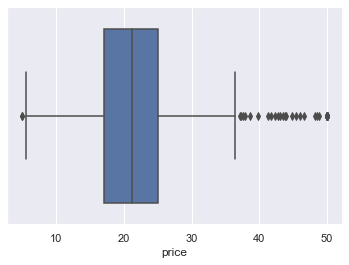

In [28]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x=df["price"])

#### Violinplot for the feature price: 

<AxesSubplot:xlabel='price'>

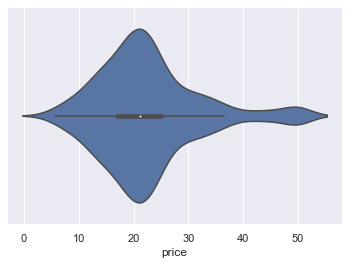

In [29]:
sns.violinplot(x=df["price"])

#### violinplot for all features :  

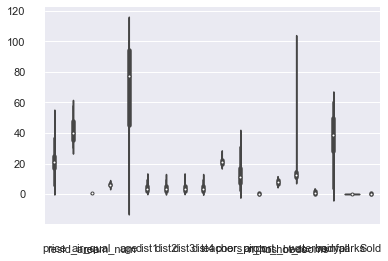

In [30]:
f, ax = plt.subplots()
sns.violinplot(data=df)
sns.despine(offset=10, trim=True);
sns.set(rc={'figure.figsize':(20,5)})


#### Boxplot for all features  :

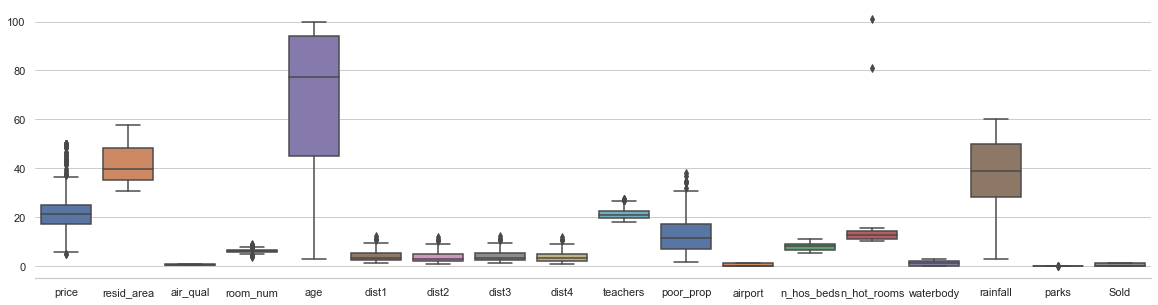

In [31]:
sns.set_style("whitegrid")
sns.boxplot(data=df, palette="deep")
sns.despine(left=True)
sns.set(rc={'figure.figsize':(20,15)})


seconde methode   : Z_score

In [32]:
from scipy import stats

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)

#Or use thise methode to show the results 
df.apply(stats.zscore)


,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold
0,0.160376,-1.287909,-0.144217,0.413672,-0.120013,0.179451,0.086032,0.103569,0.186459,1.459000,-1.075562,-0.902009,-1.610862,-0.353398,-1.128699,-1.294408,-0.480763,-0.912871
1,-0.101258,-0.593381,-0.740262,0.194274,0.367166,0.483280,0.508534,0.547446,0.687144,0.303094,-0.492439,1.108637,-0.362208,-0.166000,-0.207535,0.225431,-0.782183,1.095445
2,1.326830,-0.593381,-0.740262,1.282714,-0.265812,0.502269,0.584490,0.495503,0.644228,0.303094,-1.208727,1.108637,-0.320406,16.828839,0.713629,-0.094535,-0.818115,-0.912871
3,1.185112,-1.306878,-0.835284,1.016303,-0.809889,1.062454,1.092442,1.038545,1.116302,-0.113032,-1.361517,-0.902009,0.943081,-0.339029,-0.207535,0.465405,-0.687571,-0.912871
4,1.490352,-1.306878,-0.835284,1.228577,-0.511180,1.038717,1.059212,1.137709,1.068618,-0.113032,-1.026501,1.108637,0.643728,-0.334750,-0.207535,1.265320,-1.410280,-0.912871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.014047,0.115738,0.158124,0.439316,0.018673,-0.632342,-0.559590,-0.566969,-0.743385,-1.176466,-0.418147,1.108637,0.997019,-0.164777,1.634793,-0.974442,0.146086,1.095445
502,-0.210273,0.115738,0.158124,-0.234548,0.288933,-0.727289,-0.720996,-0.708632,-0.705237,-1.176466,-0.500850,-0.902009,-0.847646,0.023538,1.634793,-1.534383,0.513037,1.095445
503,0.149475,0.115738,0.158124,0.984960,0.797449,-0.774762,-0.744732,-0.788908,-0.781532,-1.176466,-0.983048,1.108637,-1.612210,-0.162484,0.713629,-0.654476,0.293573,1.095445
504,-0.057653,0.115738,0.158124,0.725672,0.736996,-0.679816,-0.626051,-0.736965,-0.624174,-1.176466,-0.865302,-0.902009,0.047718,0.407812,0.713629,0.625388,0.587494,1.095445


we delete lines that have abs(z)>3 , because they represent the extreme values

In [33]:
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
new_df


,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,0,5.480,11.1920,0,23,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,1,7.332,12.1728,1,42,0.046146,1
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,0,9.268,11.2672,1,45,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,1,8.824,11.2896,1,55,0.039474,0
5,28.7,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,0,7.174,14.2296,2,53,0.045910,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,1,9.348,12.1792,3,27,0.056006,1
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,0,6.612,13.1648,3,20,0.059903,1
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,1,5.478,12.1912,2,31,0.057572,1
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,0,7.940,15.1760,2,47,0.060694,1


In [34]:
print("---------------------------------------------------")
print("Size of the dataset before the outlier treatment",df.shape)
print("---------------------------------------------------")

---------------------------------------------------
Size of the dataset before the outlier treatment (506, 18)
---------------------------------------------------


In [35]:
print("---------------------------------------------------")
print("Size of the dataset after the outlier treatment",new_df.shape)
print("---------------------------------------------------")

---------------------------------------------------
Size of the dataset after the outlier treatment (486, 18)
---------------------------------------------------


# 4/ Sampling

to extract 50% on our Dataset randomly we are going to use the function df.sample with the parametre "replace=true" to allow the deplicate values , this way we assure that our new sample will be complitely random 

In [36]:
new_df_sample = new_df.sample(frac=0.5, replace=True, random_state=1)
print(new_df_sample.shape)
new_df_sample

(243, 18)


,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold
38,24.2,35.96,0.499,5.966,30.2,4.15,3.66,4.04,3.54,20.8,10.13,0,8.184,10.1936,0,21,0.048389,1
239,23.3,34.93,0.428,6.606,42.2,6.25,6.11,6.41,5.99,23.4,7.37,1,5.566,15.1864,3,51,0.041232,0
415,7.2,48.10,0.679,6.434,100.0,1.88,1.75,1.84,1.87,19.8,29.05,1,8.644,11.0576,2,59,0.058727,0
73,23.4,40.81,0.413,6.245,6.2,5.36,5.23,5.50,5.06,20.8,7.54,0,5.968,12.1872,1,45,0.043323,0
260,33.8,33.97,0.647,7.203,81.8,2.12,1.95,2.37,2.01,27.0,9.59,0,5.968,11.2704,1,21,0.068041,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,15.6,49.58,0.871,5.628,100.0,1.82,1.49,1.69,1.06,25.3,16.65,0,5.612,10.1248,0,32,0.075905,1
432,16.1,48.10,0.584,6.425,74.8,2.40,1.92,2.34,2.14,19.8,12.03,0,8.722,10.1288,2,42,0.053705,1
238,23.7,34.93,0.428,6.481,18.5,6.26,6.12,6.45,5.93,23.4,6.36,0,7.374,12.1896,3,48,0.049068,0
46,20.0,36.91,0.448,5.786,33.3,5.25,5.00,5.40,4.75,22.1,14.15,0,9.300,12.1600,1,39,0.045462,0


# 4-1/ Train/Test Split & Linear Regression


### LinearRegression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = new_df
X = X.drop("Sold",axis=1)
y = new_df["Sold"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

reg = LinearRegression().fit(X_train, y_train)
print("----------------------------------")
print(" reg score     : ",reg.score(X, y))
print("----------------------------------")
print(" reg coef      : ",reg.coef_)
print("----------------------------------")
print(" reg intercept : ",reg.intercept_)
print("----------------------------------")



----------------------------------
 reg score     :  0.19738509141015947
----------------------------------
 reg coef      :  [-4.20485362e-02  4.97467658e-03 -1.67332256e+00  1.57856623e-01
 -9.95236848e-04  1.97012813e-01 -2.84909965e-01  1.96644843e-01
 -1.89039644e-01  5.17974164e-02 -3.49344335e-02  2.43167165e-02
  2.70546985e-02 -1.32754722e-02 -3.05544152e-02 -1.37657722e-03
  9.98223214e+00]
----------------------------------
 reg intercept :  0.18893356890108332
----------------------------------


Our LinearRegression's score is only ~ 0.2 , this die to the type of regression we are applying to our dataset . in our case we are doing a regression on a feature that have only (0 or 1) values so it's a clasification (logitic regression) not a lineare regression  

### LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0,solver='lbfgs',max_iter=10000).fit(X, y)
print("--------------------------------------------------")
print(" logitic regression score     : ",clf.score(X_train, y_train))
print("---------------------------------------------------")


--------------------------------------------------
 logitic regression score     :  0.7061855670103093
---------------------------------------------------


this result(~0.7) confirm our previous conclusion . 

##### Test of logitic regression

In [41]:
preds = clf.predict(X_test)
res = (preds == y_test).mean()
print("------------------------------------------")
print(" result of the test   : ",res)
print("------------------------------------------")

------------------------------------------
 result of the test   :  0.673469387755102
------------------------------------------


### KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37 20]
 [23 18]]
              precision    recall  f1-score   support

           0       0.62      0.65      0.63        57
           1       0.47      0.44      0.46        41

    accuracy                           0.56        98
   macro avg       0.55      0.54      0.54        98
weighted avg       0.56      0.56      0.56        98



### NAIVE BAYES

In [43]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("---------------------------------------------------------------")
print("Number of mislabeled points out of a total %d points : % d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("---------------------------------------------------------------")

---------------------------------------------------------------
Number of mislabeled points out of a total 98 points :  36
---------------------------------------------------------------


### SVM

In [44]:
from sklearn import svm
my_model = svm.SVC()
my_model.fit(X_train, y_train)
print("------------------------------------------")
print("SVM score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
SVM score : 0.5306122448979592
------------------------------------------


#### SVM with bagging :

In [45]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10).fit(X_train, y_train)
print("------------------------------------------")
print("SVM after bagging score :",clf.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
SVM after bagging score : 0.5306122448979592
------------------------------------------


### Decision Tree

In [46]:
from sklearn import tree
my_model = tree.DecisionTreeClassifier().fit(X_train, y_train)
print("------------------------------------------")
print("Decision Tree score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
Decision Tree score : 0.5714285714285714
------------------------------------------


#### Decision Tree with bagging :

In [191]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),n_estimators=10).fit(X_train, y_train)
print("------------------------------------------")
print("Decision Tree with bagging score :",clf.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
Decision Tree with bagging score : 0.5306122448979592
------------------------------------------


### LinearDiscriminantAnalysis (LDA) :

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
my_model = LinearDiscriminantAnalysis()
my_model.fit(X_train, y_train)
print("------------------------------------------")
print("LDA score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
LDA score : 0.6836734693877551
------------------------------------------


### GradientBoostingClassifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
my_model = GradientBoostingClassifier()
my_model.fit(X_train, y_train)
print("------------------------------------------")
print("GradientBoostingClassifier score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
GradientBoostingClassifier score : 0.6020408163265306
------------------------------------------


### AdaBoostClassifier

In [49]:
from sklearn.ensemble import AdaBoostClassifier
my_model = AdaBoostClassifier()
my_model.fit(X_train, y_train)
print("------------------------------------------")
print("AdaBoostClassifier score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
AdaBoostClassifier score : 0.5306122448979592
------------------------------------------


### RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier()
my_model.fit(X_train, y_train)
print("------------------------------------------")
print("RandomForestClassifier score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
RandomForestClassifier score : 0.6122448979591837
------------------------------------------


#### RandomForestClassifier with bagging :

In [51]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=10).fit(X_train, y_train)
print("------------------------------------------")
print("RandomForestClassifier with bagging score :",clf.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
RandomForestClassifier with bagging score : 0.6428571428571429
------------------------------------------


### ExtraTreesClassifier

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
my_model = ExtraTreesClassifier()
my_model.fit(X_train, y_train)
print("------------------------------------------")
print("ExtraTreesClassifier score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
ExtraTreesClassifier score : 0.6224489795918368
------------------------------------------


#### ExtraTreesClassifier with bagging :

In [53]:
clf = BaggingClassifier(base_estimator=ExtraTreesClassifier(),n_estimators=10).fit(X_train, y_train)
print("------------------------------------------")
print("ExtraTreesClassifier with bagging score :",clf.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
ExtraTreesClassifier with bagging score : 0.6326530612244898
------------------------------------------


### Perceptron model :

In [54]:
from sklearn.linear_model import Perceptron
my_model = Perceptron(tol=1e-3).fit(X_train,y_train)
print("------------------------------------------")
print("Perceptron model score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
Perceptron model score : 0.4489795918367347
------------------------------------------


#### Perceptron model with bagging :

In [55]:
clf = BaggingClassifier(base_estimator=Perceptron(),n_estimators=10).fit(X_train, y_train)
print("------------------------------------------")
print("Perceptron model with bagging score :",clf.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
Perceptron model with bagging score : 0.6020408163265306
------------------------------------------


# Neural Network 

### MLPClassifier

In [56]:
from sklearn.neural_network import MLPClassifier
my_model = MLPClassifier(max_iter=1000).fit(X_train, y_train)
print("------------------------------------------")
print("MLPClassifier score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
MLPClassifier score : 0.6530612244897959
------------------------------------------


In [57]:
my_model = MLPClassifier(hidden_layer_sizes=(10,4),max_iter=1000).fit(X_train, y_train)
print("------------------------------------------")
print("MLPClassifier score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
MLPClassifier score : 0.5306122448979592
------------------------------------------


In [58]:
my_model = MLPClassifier(hidden_layer_sizes=(5,4),max_iter=1000).fit(X_train, y_train)
print("------------------------------------------")
print("MLPClassifier score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
MLPClassifier score : 0.673469387755102
------------------------------------------


# Clustering :

### K-means

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
model = KMeans(n_clusters=2).fit(X)
print("------------------------------------------")
print("K-means clustering silhouette score :",silhouette_score(X, model.labels_))
print("------------------------------------------")

------------------------------------------
K-means clustering silhouette score : 0.4838074159133554
------------------------------------------


# Dimensionality Reduction

# PCA :

explained variance ratio (first two components): [0.74299301 0.13679256]


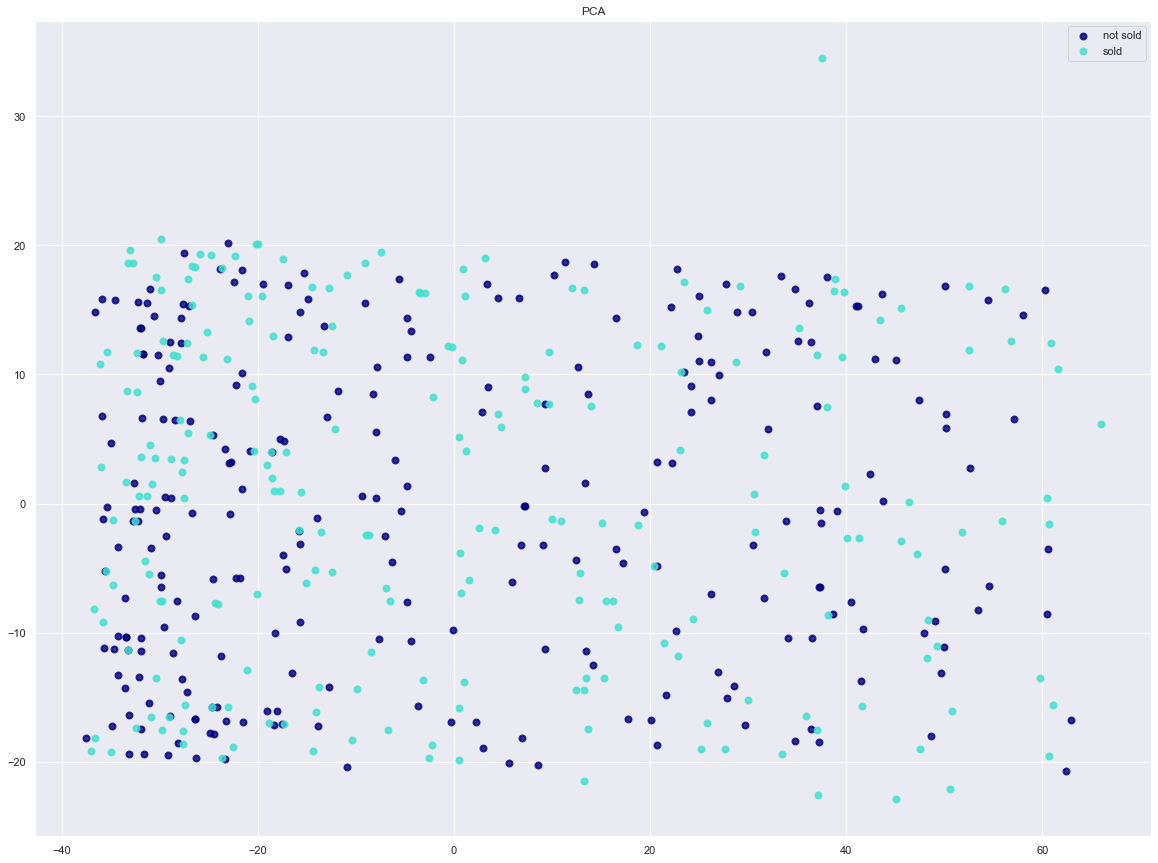

<Figure size 1440x1080 with 0 Axes>

In [60]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
target_names = ["not sold","sold"]
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
colors = ['navy', 'turquoise']
lw = 2
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')
plt.figure()
plt.show()

# Conclusion :

## *Results* :
##### Linear Regression (LR) = 
0.19
##### Logistic  Regression (LoR) = 
0.71
##### K-Nearest Neighbors(KNN)  = 
0.5
##### Naive Bayes (NB) = 
46/98 erreur
##### Support Vector Machine(SVM )= 
0.43 / 0.48
##### Decision Trees = 
0.57 /0.53
##### Linear Discriminant Analysis(LDA) = 
0.52
##### Gradient Boosting (GB) = 
0.53
##### AdaBoost =
0.55
##### Random forest = 
0.54 /0.57
##### ExtraTrees =
0.55 /0.5
##### Perceptron = 
0.55 / 0.53
##### ANN - MLP =
0.57 /0.52 /0.52
##### K-means =
0.48






- Comparing all the results that we have got we can say that the logistic regression is the fittest algorithm for similar datasets because we have binary output feature with some related variables.
- for ANN model we have tried different architectures (5 to 10 hidden layers ) and the default structure with 100 hidden layer, for the test accuracy the default structure with 100 hidden layers is the best ~ 0.60.


## Computational complexity

in this part we will test and calculate the complexity of the classifications methods that we have used in this project 

### ComplexityEvaluator class : 

In [64]:
import numpy as np
import pandas as pd
import time
from sklearn.linear_model import LinearRegression
import math
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier


class ComplexityEvaluator:

    def __init__(self, nrow_samples, ncol_samples):
        self._nrow_samples = nrow_samples
        self._ncol_samples = ncol_samples

    def _time_samples(self, model, random_data_generator):
        rows_list = []
        for nrow in self._nrow_samples:
            for ncol in self._ncol_samples:
                train, labels = random_data_generator(nrow, ncol)

                start_time = time.time()
                model.fit(train, labels)
                elapsed_time = time.time() - start_time

                result = {"N": nrow, "P": ncol, "Time": elapsed_time}
                rows_list.append(result)

        return rows_list

    def Run(self, model, random_data_generator):
        data = pd.DataFrame(self._time_samples(model, random_data_generator))
        print(data)
        data = data.applymap(math.log)
        linear_model = LinearRegression(fit_intercept=True)
        linear_model.fit(data[["N", "P"]], data[["Time"]])
        return linear_model.coef_

### Complexity of every algorithm :

In [67]:
if __name__ == "__main__":

    def random_data_classification(n, p):
        return np.random.rand(n, p), np.random.binomial(1, 0.5, n)

    classification_models = [RandomForestClassifier(),
                         ExtraTreesClassifier(),
                         AdaBoostClassifier(),
                         svm.SVC(),
                         LogisticRegression(),KMeans(),GradientBoostingClassifier()]

    complexity_evaluator = ComplexityEvaluator(
            [200, 500, 1000, 2000, 3000], [1,5,10])
    for model in classification_models:
        print("test of :",model)
        res = complexity_evaluator.Run(model, random_data_classification)
        print(res)
        print("****************************************************")

test of : RandomForestClassifier()
       N   P      Time
0    200   1  0.220411
1    200   5  0.185505
2    200  10  0.235369
3    500   1  0.251326
4    500   5  0.287232
5    500  10  0.276262
6   1000   1  0.257310
7   1000   5  0.385969
8   1000  10  0.458771
9   2000   1  0.516619
10  2000   5  0.683169
11  2000  10  0.779914
12  3000   1  0.902601
13  3000   5  0.925510
14  3000  10  1.224719
[[0.56655648 0.11885106]]
****************************************************
test of : ExtraTreesClassifier()
       N   P      Time
0    200   1  0.143629
1    200   5  0.119666
2    200  10  0.118682
3    500   1  0.151596
4    500   5  0.188495
5    500  10  0.239363
6   1000   1  0.316151
7   1000   5  0.340093
8   1000  10  0.308170
9   2000   1  0.286242
10  2000   5  0.365019
11  2000  10  0.349064
12  3000   1  0.384970
13  3000   5  0.517615
14  3000  10  0.467750
[[0.45704429 0.05951171]]
****************************************************
test of : AdaBoostClassifier()
       